In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import os
%matplotlib inline

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
df_ballbyball = pd.read_excel("IPL Ball-by-Ball 2008-2020.xlsx")

In [4]:
df_ballbyball.head(10)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
5,335982,1,7,4,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
6,335982,1,7,5,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
7,335982,1,7,6,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
8,335982,1,8,1,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
9,335982,1,8,2,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
df2_allmatches = pd.read_excel("IPL Matches 2008-2020.xlsx")

In [6]:
df2_allmatches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [7]:
df_ballbyball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [8]:
df2_allmatches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               816 non-null    int64         
 1   city             803 non-null    object        
 2   date             816 non-null    datetime64[ns]
 3   player_of_match  812 non-null    object        
 4   venue            816 non-null    object        
 5   neutral_venue    816 non-null    int64         
 6   team1            816 non-null    object        
 7   team2            816 non-null    object        
 8   toss_winner      816 non-null    object        
 9   toss_decision    816 non-null    object        
 10  winner           812 non-null    object        
 11  result           812 non-null    object        
 12  result_margin    799 non-null    float64       
 13  eliminator       812 non-null    object        
 14  method           19 non-null     object   

In [9]:
for i in range(0, df_ballbyball.select_dtypes(include='object').shape[1]):
    print(df_ballbyball.select_dtypes(include='object').columns[i])
    
    print('')
    print(df_ballbyball[df_ballbyball.select_dtypes(include='object').columns[i]].unique())
    



batsman

['RT Ponting' 'BB McCullum' 'DJ Hussey' 'Mohammad Hafeez' 'SC Ganguly'
 'CL White' 'MV Boucher' 'B Akhil' 'AA Noffke' 'P Kumar' 'Z Khan'
 'SB Joshi' 'W Jaffer' 'JH Kallis' 'R Dravid' 'V Kohli' 'K Goel'
 'MEK Hussey' 'JR Hopes' 'SK Raina' 'JDP Oram' 'S Badrinath' 'PA Patel'
 'ML Hayden' 'MS Dhoni' 'KC Sangakkara' 'Yuvraj Singh' 'SM Katich'
 'IK Pathan' 'T Kohli' 'YK Pathan' 'S Dhawan' 'G Gambhir' 'SK Warne'
 'D Salunkhe' 'SK Trivedi' 'V Sehwag' 'SR Watson' 'M Kaif' 'DS Lehmann'
 'RA Jadeja' 'M Rawat' 'L Ronchi' 'ST Jayasuriya' 'DJ Thornely'
 'RV Uthappa' 'PR Shah' 'AM Nayar' 'SM Pollock' 'Harbhajan Singh'
 'S Chanderpaul' 'LRPL Taylor' 'WP Saha' 'AS Yadav' 'A Symonds'
 'SB Bangar' 'WPUJC Vaas' 'RP Singh' 'AC Gilchrist' 'Y Venugopal Rao'
 'VVS Laxman' 'RG Sharma' 'SB Styris' 'LR Shukla' 'PP Chawla'
 'Kamran Akmal' 'DPMD Jayawardene' 'S Sohal' 'B Lee' 'WA Mota'
 'Shahid Afridi' 'DJ Bravo' 'A Nehra' 'MA Khote' 'GC Smith' 'Pankaj Singh'
 'S Sreesanth' 'VRV Singh' 'SS Tiwary' 'RR Sa

In [10]:
df2_allmatches.duplicated().sum()

0

In [11]:
df_ballbyball.duplicated().sum()

1

In [12]:
df_ballbyball = df_ballbyball.drop_duplicates()

In [13]:
df_ballbyball.duplicated().sum()

0

In [14]:
df_ballbyball.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934670e+05,193467.000000,193467.000000,193467.000000,193467.000000,193467.000000,193467.000000,193467.000000,193467.000000
mean,7.567706e+05,1.482134,9.177059,3.615981,1.240232,0.066414,1.306647,0.000083,0.049078
std,3.060969e+05,0.499682,5.676845,1.807122,1.610871,0.339992,1.598806,0.009094,0.216032
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [15]:
df_ballbyball.describe(include='object')

,batsman,non_striker,bowler,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
count,193467,193467,193467,9495,9495,6784,10233,193467,193276
unique,537,530,420,9,506,879,5,15,15
top,V Kohli,S Dhawan,Harbhajan Singh,caught,RG Sharma,MS Dhoni,wides,Mumbai Indians,Mumbai Indians
freq,4609,4593,3451,5743,167,164,5858,24465,24453


In [16]:
df2_allmatches.describe()

,id,date,neutral_venue,result_margin
count,8.160000e+02,816,816.000000,799.000000
mean,7.563496e+05,2014-04-13 19:07:03.529411840,0.094363,17.321652
min,3.359820e+05,2008-04-18 00:00:00,0.000000,1.000000
25%,5.012278e+05,2011-04-26 18:00:00,0.000000,6.000000
50%,7.292980e+05,2014-04-23 12:00:00,0.000000,8.000000
75%,1.082626e+06,2017-04-30 00:00:00,0.000000,19.500000
max,1.237181e+06,2020-11-10 00:00:00,1.000000,146.000000
std,3.058943e+05,NaN,0.292512,22.068427


In [17]:
df2_allmatches.describe(include='object')

,city,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,eliminator,method,umpire1,umpire2
count,803,812,816,816,816,816,816,812,812,812,19,816,816
unique,32,233,36,15,15,15,2,15,3,2,1,48,47
top,Mumbai,AB de Villiers,Eden Gardens,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,N,D/L,HDPK Dharmasena,S Ravi
freq,101,23,77,108,106,106,496,120,435,799,19,78,84


In [18]:
# Extracting dates from matches dataset
df2_allmatches['year'] = pd.DatetimeIndex(df2_allmatches['date']).year

In [19]:
df2_allmatches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [20]:
df2_allmatches['year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])

#### 1. What was the count of matches played in each season?

In [21]:
df2_allmatches.groupby('year')['id'].count()

year
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
Name: id, dtype: int64

#### 2. How many runs were scored in each season?

In [22]:
# Getting sum of runs in each match from ball by ball dataset
pd.set_option('display.max_rows', None)
df_runs = pd.DataFrame(df_ballbyball.groupby('id')['total_runs'].sum())
df_runs

,total_runs
id,
335982,304
335983,447
335984,261
335985,331
335986,222
335987,334
335988,285
335989,410
335990,431


#### 3. What were the runs scored per match in different seasons?

In [23]:


df_merged = pd.DataFrame(df2_allmatches.merge(df_runs, on='id', how='inner'))
df_merged

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,total_runs
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,304
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,447
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,261
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,331
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008,222
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin,2008,334
6,335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,N,NaN,IL Howell,AM Saheba,2008,285
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar,2008,410
8,335990,Hyderabad,2008-04-24,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,N,NaN,Asad Rauf,MR Benson,2008,431
9,335991,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,NaN,Aleem Dar,AM Saheba,2008,298


In [24]:
df_merged.groupby(['year','id'])['total_runs'].sum()

year  id     
2008  335982     304
      335983     447
      335984     261
      335985     331
      335986     222
      335987     334
      335988     285
      335989     410
      335990     431
      335991     298
      335992     273
      335993     299
      335994     309
      335995     320
      335996     343
      335997     275
      335998     372
      335999     331
      336000     347
      336001     341
      336002     336
      336003     347
      336004     295
      336005     219
      336006     253
      336007     292
      336008     207
      336009     375
      336010     253
      336011     281
      336012     248
      336013     344
      336014     385
      336015     315
      336016     287
      336017     243
      336018     314
      336019     401
      336020     376
      336021     135
      336022     212
      336023     329
      336024     331
      336025     204
      336026     312
      336027     297
      336028     377

#### 4. Who has umpired the most?

In [25]:
df2_allmatches['umpire1'].value_counts().sort_values(ascending=False).head(1)

umpire1
HDPK Dharmasena    78
Name: count, dtype: int64

In [26]:
df2_allmatches['umpire2'].value_counts().sort_values(ascending=False).head(1)

umpire2
S Ravi    84
Name: count, dtype: int64

In [27]:
umpire1_counts = pd.DataFrame(df2_allmatches['umpire1'].value_counts())

In [28]:
umpire1_counts

,count
umpire1,
HDPK Dharmasena,78
AK Chaudhary,56
Asad Rauf,51
M Erasmus,40
Aleem Dar,38
BF Bowden,37
S Ravi,37
BR Doctrove,34
CB Gaffaney,34


In [29]:
umpire2_counts = pd.DataFrame(df2_allmatches['umpire2'].value_counts())

In [30]:
umpire2_counts

,count
umpire2,
S Ravi,84
C Shamshuddin,60
SJA Taufel,54
CK Nandan,49
RJ Tucker,41
Nitin Menon,37
BNJ Oxenford,32
VA Kulkarni,31
AK Chaudhary,31


In [31]:
df_merge_umpires = pd.concat([umpire1_counts, umpire2_counts])
df_merge_umpires.index.rename('Umpire', inplace=True)
df_merge_umpires

,count
Umpire,
HDPK Dharmasena,78
AK Chaudhary,56
Asad Rauf,51
M Erasmus,40
Aleem Dar,38
BF Bowden,37
S Ravi,37
BR Doctrove,34
CB Gaffaney,34


In [32]:
df_merge_umpires.groupby('Umpire')['count'].sum().sort_values(ascending=False)

Umpire
S Ravi                   121
HDPK Dharmasena           94
AK Chaudhary              87
C Shamshuddin             82
M Erasmus                 65
Nitin Menon               57
CK Nandan                 57
SJA Taufel                55
Asad Rauf                 51
VA Kulkarni               50
BNJ Oxenford              48
CB Gaffaney               47
RJ Tucker                 46
BR Doctrove               42
RE Koertzen               41
Aleem Dar                 38
NJ Llong                  37
BF Bowden                 37
KN Ananthapadmanabhan     33
RK Illingworth            31
SK Tarapore               31
S Asnani                  30
RB Tiffin                 30
AY Dandekar               28
DJ Harper                 27
AM Saheba                 26
VK Sharma                 26
A Nand Kishore            25
PR Reiffel                24
K Hariharan               21
YC Barde                  19
SS Hazare                 17
JD Cloete                 17
BG Jerling                17
S Das  

In [33]:
# S Ravi has umpired the most


#### 5. Which team has won the most tosses?

In [34]:
df_merged.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,total_runs
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,304
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,447
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,261
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,331
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008,222


In [35]:
df_merged['toss_winner'].value_counts()
# Mumbai Indias won most of the tosses

toss_winner
Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64

#### 6. What does the team decide after winning the toss?

In [36]:
df_merged['toss_decision'].value_counts()
# Mostly fielding is choosen after winning the toss

toss_decision
field    496
bat      320
Name: count, dtype: int64

#### 7. How does the toss decision vary across seasons?

<Axes: xlabel='year,toss_decision'>

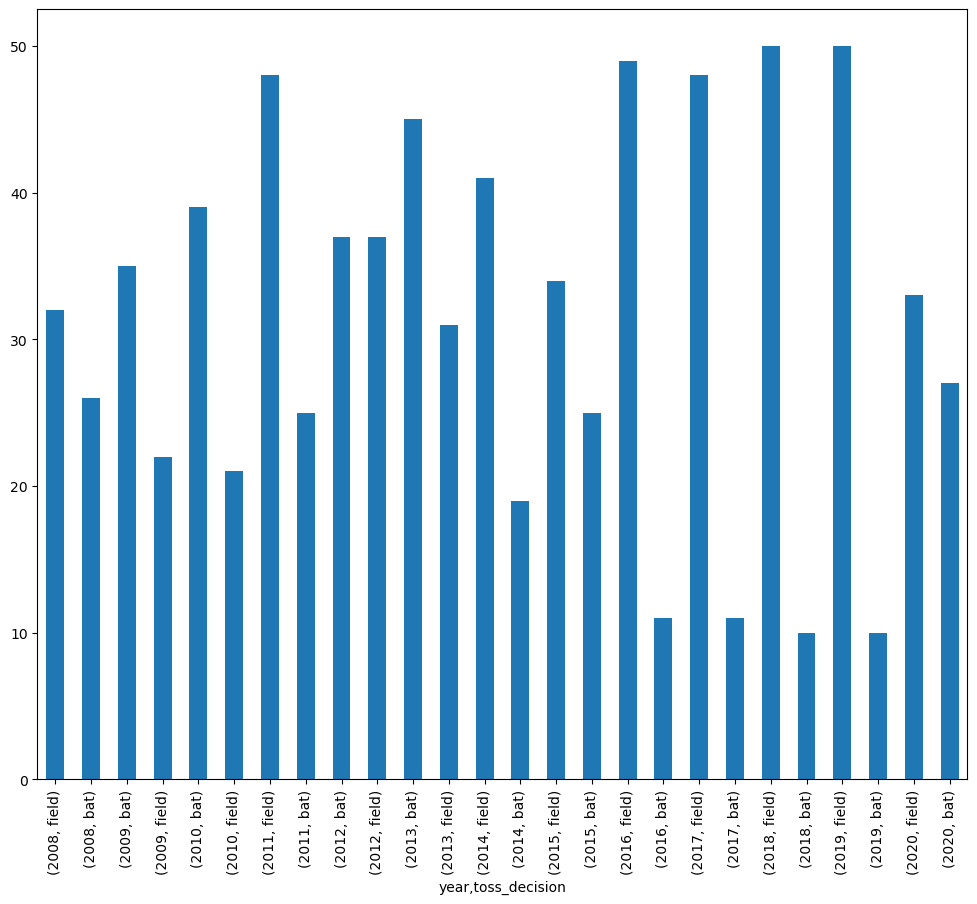

In [37]:
plt.figure(figsize=(12,10))
df_merged.groupby('year')['toss_decision'].value_counts().plot(kind='bar')

#### 8. Does winning the toss imply winning the game?

In [38]:
pd.DataFrame(df_merged.groupby('toss_winner')['winner'].value_counts())
# Except Pune Warriors all other teams won most of the matches when they won the toss

count
toss_winner                 winner                            
Chennai Super Kings         Chennai Super Kings             61
                            Mumbai Indians                   7
                            Royal Challengers Bangalore      5
                            Kings XI Punjab                  5
                            Rajasthan Royals                 5
                            Delhi Daredevils                 4
                            Kolkata Knight Riders            4
                            Delhi Capitals                   2
                            Sunrisers Hyderabad              2
                            Pune Warriors                    1
                            Deccan Chargers                  1
Deccan Chargers             Deccan Chargers                 19
                            Delhi Daredevils                 5
                            Mumbai Indians                   4
                            Kolkata Knight Riders            3
                            Rajasthan Royals                 3
                            Royal Challengers Bangalore      3
                            Kings XI Punjab                  3
                            Chennai Super Kings              2
                            Pune Warriors                    1
Delhi Capitals              Delhi Capitals                  10
                            Mumbai Indians                   3
                            Chennai Super Kings              2
                            Kings XI Punjab                  2
                            Sunrisers Hyderabad              2
                            Kolkata Knight Riders            1
Delhi Daredevils            Delhi Daredevils                35
                            Mumbai Indians                   9
                            Kings XI Punjab                  7
                            Rajasthan Royals                 7
                            Chennai Super Kings              5
                            Kolkata Knight Riders            5
                            Royal Challengers Bangalore      5
                            Sunrisers Hyderabad              4
                            Gujarat Lions                    1
                            Pune Warriors                    1
Gujarat Lions               Gujarat Lions                   10
                            Kings XI Punjab                  2
                            Royal Challengers Bangalore      2
                            Mumbai Indians                   1
Kings XI Punjab             Kings XI Punjab                 36
                            Sunrisers Hyderabad              8
                            Kolkata Knight Riders            8
                            Royal Challengers Bangalore      7
                            Mumbai Indians                   7
                            Rajasthan Royals                 6
                            Chennai Super Kings              4
                            Delhi Daredevils                 3
                            Pune Warriors                    2
                            Deccan Chargers                  2
                            Rising Pune Supergiants          1
                            Delhi Capitals                   1
Kochi Tuskers Kerala        Kochi Tuskers Kerala             4
                            Royal Challengers Bangalore      2
                            Deccan Chargers                  1
                            Pune Warriors                    1
Kolkata Knight Riders       Kolkata Knight Riders           55
                            Mumbai Indians                   9
                            Chennai Super Kings              6
                            Kings XI Punjab                  6
                            Delhi Daredevils                 5
                            Sunrisers Hyderabad              5
                         

#### 9. How many times has the chasing team won the match?

In [39]:
df_tosswinner_winner = df_merged[df_merged['toss_decision']=='field'].loc[:,['toss_winner','winner']]
df_tosswinner_winner

,toss_winner,winner
0,Royal Challengers Bangalore,Kolkata Knight Riders
7,Mumbai Indians,Chennai Super Kings
8,Rajasthan Royals,Rajasthan Royals
9,Mumbai Indians,Kings XI Punjab
10,Rajasthan Royals,Rajasthan Royals
12,Deccan Chargers,Deccan Chargers
16,Royal Challengers Bangalore,Delhi Daredevils
17,Kings XI Punjab,Kings XI Punjab
22,Delhi Daredevils,Mumbai Indians
24,Kings XI Punjab,Kings XI Punjab


In [40]:
len(df_tosswinner_winner[df_tosswinner_winner['toss_winner']==df_tosswinner_winner['winner']])

273

#### 10. Which all teams had won this tournament?

In [41]:
df_merged.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,total_runs
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,304
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,447
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,261
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,331
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008,222


In [42]:
df_merged.groupby(df_merged.date.dt.strftime('%Y')).tail(1).loc[:,['year','winner']]

,year,winner
57,2008,Rajasthan Royals
114,2009,Deccan Chargers
174,2010,Chennai Super Kings
247,2011,Chennai Super Kings
321,2012,Kolkata Knight Riders
397,2013,Mumbai Indians
457,2014,Kolkata Knight Riders
516,2015,Mumbai Indians
576,2016,Sunrisers Hyderabad
635,2017,Mumbai Indians


#### 11. Which team has played the most number of matches?

In [43]:
df_team1 = df_merged.groupby('team1')['id'].count()
df_team1

team1
Chennai Super Kings             94
Deccan Chargers                 39
Delhi Capitals                  19
Delhi Daredevils                83
Gujarat Lions                   16
Kings XI Punjab                 92
Kochi Tuskers Kerala             7
Kolkata Knight Riders           95
Mumbai Indians                  97
Pune Warriors                   23
Rajasthan Royals                70
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Royal Challengers Bangalore    108
Sunrisers Hyderabad             59
Name: id, dtype: int64

In [44]:
df_team2 = df_merged.groupby('team2')['id'].count()
df_team2

team2
Chennai Super Kings             84
Deccan Chargers                 36
Delhi Capitals                  14
Delhi Daredevils                78
Gujarat Lions                   14
Kings XI Punjab                 98
Kochi Tuskers Kerala             7
Kolkata Knight Riders           97
Mumbai Indians                 106
Pune Warriors                   23
Rajasthan Royals                91
Rising Pune Supergiant           9
Rising Pune Supergiants          7
Royal Challengers Bangalore     87
Sunrisers Hyderabad             65
Name: id, dtype: int64

In [45]:
df_allteams = pd.concat([df_team1, df_team2])
df_allteams.index.rename('All teams', inplace=True)
df_allteams

All teams
Chennai Super Kings             94
Deccan Chargers                 39
Delhi Capitals                  19
Delhi Daredevils                83
Gujarat Lions                   16
Kings XI Punjab                 92
Kochi Tuskers Kerala             7
Kolkata Knight Riders           95
Mumbai Indians                  97
Pune Warriors                   23
Rajasthan Royals                70
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Royal Challengers Bangalore    108
Sunrisers Hyderabad             59
Chennai Super Kings             84
Deccan Chargers                 36
Delhi Capitals                  14
Delhi Daredevils                78
Gujarat Lions                   14
Kings XI Punjab                 98
Kochi Tuskers Kerala             7
Kolkata Knight Riders           97
Mumbai Indians                 106
Pune Warriors                   23
Rajasthan Royals                91
Rising Pune Supergiant           9
Rising Pune Supergiants          7
Royal Chal

In [46]:
df_allteams = pd.DataFrame(df_allteams)
df_allteams.groupby('All teams')['id'].sum().sort_values(ascending=False)

All teams
Mumbai Indians                 203
Royal Challengers Bangalore    195
Kolkata Knight Riders          192
Kings XI Punjab                190
Chennai Super Kings            178
Delhi Daredevils               161
Rajasthan Royals               161
Sunrisers Hyderabad            124
Deccan Chargers                 75
Pune Warriors                   46
Delhi Capitals                  33
Gujarat Lions                   30
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: id, dtype: int64

#### 12. Which team has won the most number of times?

In [47]:
df_merged['winner'].value_counts()

winner
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

#### 13. Which team has the highest winning percentage?

In [162]:
df_merged.head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,total_runs
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,304
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,447
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,261


In [166]:
round(df_merged['winner'].value_counts(normalize=True)*100,2)

winner
Mumbai Indians                 14.78
Chennai Super Kings            13.05
Kolkata Knight Riders          12.19
Royal Challengers Bangalore    11.21
Kings XI Punjab                10.84
Rajasthan Royals                9.98
Delhi Daredevils                8.25
Sunrisers Hyderabad             8.13
Deccan Chargers                 3.57
Delhi Capitals                  2.34
Gujarat Lions                   1.60
Pune Warriors                   1.48
Rising Pune Supergiant          1.23
Kochi Tuskers Kerala            0.74
Rising Pune Supergiants         0.62
Name: proportion, dtype: float64

In [ ]:
# Mumbai indian has highest winning percentage

#### 14. Is there any lucky venue for a particular team?

In [48]:
df_merged.groupby('winner')['venue'].value_counts()

winner                       venue                                               
Chennai Super Kings          MA Chidambaram Stadium, Chepauk                         40
                             Wankhede Stadium                                         7
                             Feroz Shah Kotla                                         6
                             Dubai International Cricket Stadium                      6
                             Eden Gardens                                             5
                             Maharashtra Cricket Association Stadium                  5
                             M Chinnaswamy Stadium                                    4
                             Rajiv Gandhi International Stadium, Uppal                3
                             Punjab Cricket Association Stadium, Mohali               3
                             JSCA International Stadium Complex                       3
                             Sheikh Za

In [49]:
df_group = df_merged.groupby('winner')['venue'].value_counts().reset_index(name = 'count')
df_group

,winner,venue,count
0,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",40
1,Chennai Super Kings,Wankhede Stadium,7
2,Chennai Super Kings,Feroz Shah Kotla,6
3,Chennai Super Kings,Dubai International Cricket Stadium,6
4,Chennai Super Kings,Eden Gardens,5
5,Chennai Super Kings,Maharashtra Cricket Association Stadium,5
6,Chennai Super Kings,M Chinnaswamy Stadium,4
7,Chennai Super Kings,"Rajiv Gandhi International Stadium, Uppal",3
8,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",3
9,Chennai Super Kings,JSCA International Stadium Complex,3


In [50]:
df_group.groupby('winner').head(3)

,winner,venue,count
0,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",40
1,Chennai Super Kings,Wankhede Stadium,7
2,Chennai Super Kings,Feroz Shah Kotla,6
25,Deccan Chargers,Barabati Stadium,3
26,Deccan Chargers,"Rajiv Gandhi International Stadium, Uppal",3
27,Deccan Chargers,Newlands,2
41,Delhi Capitals,Feroz Shah Kotla,4
42,Delhi Capitals,Dubai International Cricket Stadium,4
43,Delhi Capitals,Sharjah Cricket Stadium,3
51,Delhi Daredevils,Feroz Shah Kotla,27


In [51]:
# For teams Chennai Super Kings, Delhi Daredevils, Kings XI Punjab, Kolkata Knight Riders, Mumbai Indians, Rajasthan Royals, 
# Royal Challengers Bangalore and Sunrisers Hyderabad, the home grounds seem luckier


#### 15. Innings wise comparison between teams

In [52]:
df_ballbyball.head(5)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [53]:
# Inning wise comparison for bowling teams
df_ballbyball.groupby(['inning','bowling_team']).agg({'total_runs': 'sum', 'is_wicket': 'sum','extra_runs':'sum'})

total_runs  is_wicket  extra_runs
inning bowling_team                                                  
1      Chennai Super Kings               13657        533         641
       Deccan Chargers                    5207        194         294
       Delhi Capitals                     2762         99         106
       Delhi Daredevils                  14515        545         718
       Gujarat Lions                      2780         92          90
       Kings XI Punjab                   15737        551         780
       Kochi Tuskers Kerala                988         41          57
       Kolkata Knight Riders             15781        593         769
       Mumbai Indians                    14832        566         877
       Pune Warriors                      3932        137         196
       Rajasthan Royals                  14362        530         761
       Rising Pune Supergiant             1251         59          54
       Rising Pune Supergiants            1016         47          52
       Royal Challengers Bangalore       16310        600         883
       Sunrisers Hyderabad                8682        341         373
2      Chennai Super Kings               13588        571         660
       Deccan Chargers                    6411        252         365
       Delhi Capitals                     2589        113         124
       Delhi Daredevils                  10199        367         550
       Gujarat Lions                      2299         57          98
       Kings XI Punjab                   14690        519         787
       Kochi Tuskers Kerala                998         33          53
       Kolkata Knight Riders             13593        486         692
       Mumbai Indians                    16326        671         839
       Pune Warriors                      2869         98         134
       Rajasthan Royals                  10343        380         591
       Rising Pune Supergiant             1185         54          57
       Rising Pune Supergiants            1097         29          56
       Royal Challengers Bangalore       14286        515         787
       Sunrisers Hyderabad               10252        412         384

In [54]:
# Inning wise comparison for batting teams
df_ballbyball.groupby(['inning','batting_team']).agg({'total_runs': 'sum', 'is_wicket': 'sum','extra_runs':'sum'})

total_runs  is_wicket  extra_runs
inning batting_team                                                  
1      Chennai Super Kings               15344        484         729
       Deccan Chargers                    6765        278         321
       Delhi Capitals                     2860        103         119
       Delhi Daredevils                  11247        442         586
       Gujarat Lions                      2267        100          93
       Kings XI Punjab                   15710        629         852
       Kochi Tuskers Kerala               1009         51          78
       Kolkata Knight Riders             14842        576         762
       Mumbai Indians                    18337        667         972
       Pune Warriors                      2973        125         154
       Rajasthan Royals                  11236        447         582
       Rising Pune Supergiant             1304         48          53
       Rising Pune Supergiants            1123         37          47
       Royal Challengers Bangalore       15774        553         759
       Sunrisers Hyderabad               11277        398         565
2      Chennai Super Kings               13019        434         681
       Deccan Chargers                    4698        206         257
       Delhi Capitals                     2436        109         103
       Delhi Daredevils                  13038        508         688
       Gujarat Lions                      2589         88         136
       Kings XI Punjab                   14307        522         669
       Kochi Tuskers Kerala                892         35          65
       Kolkata Knight Riders             14541        529         855
       Mumbai Indians                    13948        522         767
       Pune Warriors                      3385        173         164
       Rajasthan Royals                  13271        506         599
       Rising Pune Supergiant             1166         42          47
       Rising Pune Supergiants             940         31          54
       Royal Challengers Bangalore       14440        563         714
       Sunrisers Hyderabad                8055        289         378

#### 16. Which team has scored the most number of 200+ scores?

In [55]:
df_ballbyball.head(3)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [56]:
df_200runs = pd.DataFrame(df_ballbyball.groupby(['id','batting_team'])['total_runs'].sum())
df_200runs.reset_index(inplace=True)

In [57]:
df_200runs = df_200runs[df_200runs['total_runs']>200]
df_200runs

,id,batting_team,total_runs
0,335982,Kolkata Knight Riders,222
2,335983,Chennai Super Kings,240
3,335983,Kings XI Punjab,207
14,335989,Chennai Super Kings,208
15,335989,Mumbai Indians,202
16,335990,Deccan Chargers,214
17,335990,Rajasthan Royals,217
65,336014,Kolkata Knight Riders,204
74,336019,Kings XI Punjab,221
100,336033,Chennai Super Kings,201


In [58]:
df_200runs['batting_team'].value_counts().head(1)

batting_team
Royal Challengers Bangalore    17
Name: count, dtype: int64

#### 17. Which team has conceded 200+ scores the most?

In [59]:
df_200runs_concede = pd.DataFrame(df_ballbyball.groupby(['id','bowling_team'])['total_runs'].sum())
df_200runs_concede.reset_index(inplace=True)

In [60]:
df_200runs_concede = df_200runs_concede[df_200runs_concede['total_runs']>200]
df_200runs_concede

,id,bowling_team,total_runs
1,335982,Royal Challengers Bangalore,222
2,335983,Chennai Super Kings,207
3,335983,Kings XI Punjab,240
14,335989,Chennai Super Kings,202
15,335989,Mumbai Indians,208
16,335990,Deccan Chargers,217
17,335990,Rajasthan Royals,214
64,336014,Deccan Chargers,204
75,336019,Rajasthan Royals,221
100,336033,Chennai Super Kings,211


In [61]:
df_200runs_concede['bowling_team'].value_counts().head(1)

bowling_team
Kings XI Punjab    18
Name: count, dtype: int64

#### 18. What was the highest run scored by a team in a single match?

In [62]:
df_200runs[df_200runs['total_runs']==df_200runs['total_runs'].max()]

,id,batting_team,total_runs
702,598027,Royal Challengers Bangalore,263


#### 19. Which is the biggest win in terms of run margin?

In [82]:
df_big_win1 = df_ballbyball.groupby(['id','inning'])['total_runs'].sum().reset_index()

df_big_win1 = df_big_win1.pivot(index='id', columns='inning', values='total_runs')
df_big_win1

inning,1,2
id,,
335982,222.0,82.0
335983,240.0,207.0
335984,129.0,132.0
335985,165.0,166.0
335986,110.0,112.0
335987,166.0,168.0
335988,142.0,143.0
335989,208.0,202.0
335990,214.0,217.0


In [84]:
df_big_win1['run difference'] = np.sqrt((df_big_win1[2] - df_big_win1[1])**2)
df_big_win1

inning,1,2,run difference
id,,,
335982,222.0,82.0,140.0
335983,240.0,207.0,33.0
335984,129.0,132.0,3.0
335985,165.0,166.0,1.0
335986,110.0,112.0,2.0
335987,166.0,168.0,2.0
335988,142.0,143.0,1.0
335989,208.0,202.0,6.0
335990,214.0,217.0,3.0


In [85]:
df_big_win1['run difference'].sort_values(ascending=False)

id
829813     185.0
1082635    146.0
980987     144.0
335982     140.0
829785     138.0
598027     130.0
1175366    118.0
501260     111.0
336038     105.0
1136601    102.0
733993      99.0
419114      98.0
1216510     97.0
829753      97.0
1082599     97.0
336025      94.0
729293      93.0
1136566     93.0
392185      92.0
392197      92.0
980999      91.0
1216524     88.0
598019      87.0
598020      86.0
548380      86.0
501244      85.0
980973      85.0
1216540     82.0
1082617     82.0
501264      82.0
980993      80.0
1178425     80.0
1082648     80.0
392186      79.0
392210      78.0
392209      78.0
598051      77.0
501251      76.0
392182      75.0
829743      75.0
548311      74.0
729295      72.0
1136573     71.0
829819      71.0
1216542     69.0
419134      67.0
335991      66.0
1136578     65.0
336023      65.0
598050      65.0
1136577     64.0
419138      63.0
501249      63.0
734011      62.0
1082624     61.0
1216530     60.0
598046      60.0
1216497     59.0
1216519    

In [90]:
df_merged[df_merged['id'] == 829813]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,total_runs
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan,2015,189


In [91]:
df_merged[df_merged['id'] == 1082635]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,total_runs
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017,278


In [93]:
df_merged[df_merged['result_margin']==df_merged['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,total_runs
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017,278


In [ ]:
# Mumbai Indians won with highest margin

#### 20. Which batsmen have played the most number of balls?

In [94]:
df_ballbyball.head(3)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [96]:
df_ballbyball['batsman'].value_counts().head(1)

batsman
V Kohli    4609
Name: count, dtype: int64

#### 21. Who are the leading run-scorers of all time?

In [100]:
df_ballbyball.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head()

batsman
V Kohli      5878
SK Raina     5368
DA Warner    5254
RG Sharma    5230
S Dhawan     5197
Name: batsman_runs, dtype: int64

In [ ]:
# V Kohli is the leading run scorer of all time

#### 22. Who has hit the most number of 4's?

In [102]:
df_ballbyball[df_ballbyball['batsman_runs']==4]['batsman'].value_counts().head()

batsman
S Dhawan     591
DA Warner    510
V Kohli      504
SK Raina     493
G Gambhir    492
Name: count, dtype: int64

In [ ]:
# S Dhawan hit most number of 4's

#### 23. Who has hit the most number of 6's?

In [103]:
df_ballbyball[df_ballbyball['batsman_runs']==6]['batsman'].value_counts().head()

batsman
CH Gayle          349
AB de Villiers    235
MS Dhoni          216
RG Sharma         214
V Kohli           202
Name: count, dtype: int64

In [ ]:
# CH Gayle hit most number of 6's

#### 24. Who has the highest strike rate?

In [114]:
df_ballsplayed = pd.DataFrame(df_ballbyball['batsman'].value_counts().reset_index(name='balls played'))
df_ballsplayed.head()

,batsman,balls played
0,V Kohli,4609
1,S Dhawan,4208
2,RG Sharma,4088
3,SK Raina,4041
4,DA Warner,3819


In [115]:
df_runs1 = pd.DataFrame(df_ballbyball.groupby('batsman')['batsman_runs'].sum().reset_index(name='runs scored'))
df_runs1.head()

,batsman,runs scored
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Dananjaya,4


In [116]:
df_strikerate = pd.DataFrame(df_ballsplayed.merge(df_runs1, on='batsman', how='inner'))
df_strikerate.head()

,batsman,balls played,runs scored
0,V Kohli,4609,5878
1,S Dhawan,4208,5197
2,RG Sharma,4088,5230
3,SK Raina,4041,5368
4,DA Warner,3819,5254


In [113]:
df_strikerate['strikerate'] = df_strikerate['runs scored'] / df_strikerate['balls played']
df_strikerate.sort_values('strikerate', ascending=False)

,batsman,balls played,runs scored,strikerate
520,B Stanlake,2,5,2.500000
394,Umar Gul,19,39,2.052632
519,RS Sodhi,2,4,2.000000
315,Shahid Afridi,46,81,1.760870
436,TU Deshpande,12,21,1.750000
493,I Malhotra,4,7,1.750000
66,AD Russell,882,1517,1.719955
285,LJ Wright,63,106,1.682540
280,Abdul Samad,66,111,1.681818
508,Shivam Sharma,3,5,1.666667


In [ ]:
# Highest strike rate is for B Stanlake

#### 25. Who is the leading wicket-taker?

In [126]:
df_ballbyball[df_ballbyball['is_wicket']==1].groupby('bowler')['id'].count().sort_values(ascending=False).head()

bowler
SL Malinga         188
DJ Bravo           175
A Mishra           169
PP Chawla          164
Harbhajan Singh    161
Name: id, dtype: int64

In [ ]:
# SL Malinga is the leading wicket taker

#### 26. Which stadium has hosted the most number of matches?

In [127]:
df_merged.head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,total_runs
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,304
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,447
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,261


In [129]:
df_merged['venue'].value_counts().head()

venue
Eden Gardens                                 77
Feroz Shah Kotla                             74
Wankhede Stadium                             73
M Chinnaswamy Stadium                        65
Rajiv Gandhi International Stadium, Uppal    64
Name: count, dtype: int64

In [ ]:
# Eden Gardens  has hosted most number of matches

#### 27. Who has won the most MOM awards?

In [131]:
df_merged['player_of_match'].value_counts().head()

player_of_match
AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
Name: count, dtype: int64

In [ ]:
# AB de Villiers has won the most MOM awards

#### 28. What is the count of fours hit in each season?

In [132]:
df_ballbyball.head(3)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [134]:
df_4s = pd.DataFrame(df_ballbyball[df_ballbyball['batsman_runs']==4].groupby('id')['id'].count().reset_index(name='number of 4s'))
df_4s.head()

,id,number of 4s
0,335982,18
1,335983,38
2,335984,32
3,335985,33
4,335986,11


In [135]:
df_seasonwise_4s = df_merged.merge(df_4s, on='id', how='inner')
df_seasonwise_4s.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,total_runs,number of 4s
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,304,18
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,447,38
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,261,32
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,331,33
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008,222,11


In [136]:
df_seasonwise_4s.groupby('year')['number of 4s'].sum().reset_index(name='number of 4s')

,year,number of 4s
0,2008,1703
1,2009,1317
2,2010,1708
3,2011,1916
4,2012,1911
5,2013,2052
6,2014,1562
7,2015,1607
8,2016,1633
9,2017,1611


#### 29. What is the count of sixes hit in each season?

In [137]:
df_6s = pd.DataFrame(df_ballbyball[df_ballbyball['batsman_runs']==6].groupby('id')['id'].count().reset_index(name='number of 6s'))
df_6s.head()

,id,number of 6s
0,335982,17
1,335983,25
2,335984,4
3,335985,11
4,335986,10


In [138]:
df_seasonwise_6s = df_merged.merge(df_6s, on='id', how='inner')
df_seasonwise_6s.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,total_runs,number of 6s
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,304,17
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,447,25
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,261,4
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,331,11
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008,222,10


In [139]:
df_seasonwise_6s.groupby('year')['number of 6s'].sum().reset_index(name='number of 6s')

,year,number of 6s
0,2008,623
1,2009,506
2,2010,585
3,2011,639
4,2012,733
5,2013,675
6,2014,714
7,2015,692
8,2016,639
9,2017,705


#### 30. What is the count of runs scored from boundaries in each season?

In [142]:
df_runs_4s = pd.DataFrame(df_seasonwise_4s.groupby('year')['number of 4s'].sum().reset_index(name='number of 4s'))
df_runs_4s['runs_from_4s'] = df_runs_4s['number of 4s']*4
df_runs_4s

,year,number of 4s,runs_from_4s
0,2008,1703,6812
1,2009,1317,5268
2,2010,1708,6832
3,2011,1916,7664
4,2012,1911,7644
5,2013,2052,8208
6,2014,1562,6248
7,2015,1607,6428
8,2016,1633,6532
9,2017,1611,6444


#### 31. What is the run contribution from boundaries in each season?

In [143]:
# Dataframe from above analysis
df_seasonwise_4s.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,total_runs,number of 4s
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,304,18
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,447,38
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,261,32
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,331,33
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008,222,11


In [144]:
df_seasonwise_4s['runs from 4s'] = df_seasonwise_4s['number of 4s']*4
df_seasonwise_4s.head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,result,result_margin,eliminator,method,umpire1,umpire2,year,total_runs,number of 4s,runs from 4s
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,304,18,72
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,...,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,447,38,152
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,...,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,261,32,128


In [146]:
# Contribution of runs from  boundaries
df_seasonwise_4s['4s contribution'] = round((df_seasonwise_4s['runs from 4s']/df_seasonwise_4s['total_runs'])*100,2)
df_seasonwise_4s.loc[:,['year','4s contribution']]

,year,4s contribution
0,2008,23.68
1,2008,34.00
2,2008,49.04
3,2008,39.88
4,2008,19.82
5,2008,41.92
6,2008,37.89
7,2008,41.95
8,2008,38.98
9,2008,40.27


#### 32. Which team has scored the most runs in the first 6 overs?

In [147]:
df_ballbyball.head(3)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [154]:
df_ballbyball[df_ballbyball['over']<=6].groupby('batting_team')['total_runs'].sum().sort_values(ascending=False).head()

batting_team
Mumbai Indians                 10475
Kings XI Punjab                10248
Kolkata Knight Riders          10172
Royal Challengers Bangalore     9909
Chennai Super Kings             9266
Name: total_runs, dtype: int64

In [ ]:
# Mumbai Indians   has scored most runs in first 6 overs

#### 33. Which team has scored the most runs in the last 4 overs?

In [155]:
df_ballbyball[df_ballbyball['over']>=16].groupby('batting_team')['total_runs'].sum().sort_values(ascending=False).head()

batting_team
Mumbai Indians                 7538
Royal Challengers Bangalore    6787
Chennai Super Kings            6655
Kings XI Punjab                6227
Kolkata Knight Riders          6224
Name: total_runs, dtype: int64

In [ ]:
# Mumbai Indians   has scored most runs in last 4 overs

#### 34. Which team has the best scoring run-rate in the first 6 overs?

In [160]:
df_runrate_6overs = pd.DataFrame(df_ballbyball[df_ballbyball['over']<=6].groupby('batting_team').agg({'total_runs': 'sum', 'ball': 'count'}))
df_runrate_6overs['run rate'] = df_runrate_6overs['total_runs']/df_runrate_6overs['ball']
df_runrate_6overs.sort_values('run rate', ascending=False)

,total_runs,ball,run rate
batting_team,,,
Gujarat Lions,1812,1309,1.384263
Rising Pune Supergiant,877,697,1.258250
Delhi Capitals,1788,1427,1.252978
Sunrisers Hyderabad,6700,5392,1.242582
Kings XI Punjab,10248,8280,1.237681
Kochi Tuskers Kerala,769,622,1.236334
Rising Pune Supergiants,744,609,1.221675
Kolkata Knight Riders,10172,8371,1.215148
Delhi Daredevils,8492,7004,1.212450


In [ ]:
# Gujarat Lions has best run rate in first 6 overs

#### 35. Which team has the best scoring run-rate in the last 4 overs?

In [161]:
df_runrate_last4over = pd.DataFrame(df_ballbyball[df_ballbyball['over']>=16].groupby('batting_team').agg({'total_runs': 'sum', 'ball': 'count'}))
df_runrate_last4over['run rate'] = df_runrate_last4over['total_runs']/df_runrate_last4over['ball']
df_runrate_last4over.sort_values('run rate', ascending=False)

,total_runs,ball,run rate
batting_team,,,
Rising Pune Supergiants,443,256,1.730469
Royal Challengers Bangalore,6787,3965,1.711728
Mumbai Indians,7538,4467,1.687486
Chennai Super Kings,6655,3946,1.686518
Kolkata Knight Riders,6224,3880,1.604124
Delhi Daredevils,5043,3150,1.600952
Rising Pune Supergiant,555,348,1.594828
Delhi Capitals,1160,743,1.561238
Sunrisers Hyderabad,4155,2687,1.546334


In [ ]:
# Rising Pune Supergiants has best run rate in last 4 overs